This notebook will look to further enhance our feature dataset by incorporating fight statstics into the data. Anew feature analysis will be run to see if any of these statistical metrics appear significant to predicting the outcome

In [2]:
import pandas as pd
stats = pd.read_csv('/Users/cstone/Documents/School/MGMT 6203/Project/raw/ufc_fight_stats_clean.txt')
stats.columns

Index(['event', 'bout', 'round', 'fighter', 'kd', 'subatt', 'rev', 'ctrl',
       'sigstr_throw', 'sigstr_land', 'total_str_throw', 'total_str_land',
       'td_throw', 'td_land', 'head_throw', 'head_land', 'body_throw',
       'body_land', 'leg_throw', 'leg_land', 'distance_throw', 'distance_land',
       'clinch_throw', 'clinch_land', 'ground_throw', 'ground_land'],
      dtype='object')

In [3]:
fighter_stats = stats.groupby('fighter')[['kd', 'subatt', 'rev', 'ctrl',
       'sigstr_throw', 'sigstr_land', 'total_str_throw', 'total_str_land',
       'td_throw', 'td_land', 'head_throw', 'head_land', 'body_throw',
       'body_land', 'leg_throw', 'leg_land', 'distance_throw', 'distance_land',
       'clinch_throw', 'clinch_land', 'ground_throw', 'ground_land']].sum().reset_index()
    

In [4]:
fight_counts = stats.groupby('fighter')['event'].nunique().reset_index()
round_counts = stats.groupby('fighter')['round'].count().reset_index()

In [5]:
df1 = fighter_stats.merge(fight_counts, on='fighter')
df2 = df1.merge(round_counts, on = 'fighter')
df2


,fighter,kd,subatt,rev,ctrl,sigstr_throw,sigstr_land,total_str_throw,total_str_land,td_throw,...,leg_throw,leg_land,distance_throw,distance_land,clinch_throw,clinch_land,ground_throw,ground_land,event,round
0,AJ Dobson,0.0,0.0,0.0,349.0,177.0,385.0,230.0,454.0,5.0,...,52.0,57.0,155.0,346.0,15.0,26.0,7.0,13.0,3,9
1,AJ Fletcher,0.0,3.0,3.0,612.0,153.0,313.0,242.0,417.0,4.0,...,29.0,35.0,131.0,275.0,12.0,20.0,10.0,18.0,4,10
2,Aalon Cruz,0.0,0.0,0.0,16.0,2.0,15.0,2.0,15.0,0.0,...,0.0,4.0,2.0,15.0,0.0,0.0,0.0,0.0,2,2
3,Aaron Brink,0.0,0.0,0.0,4.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,1,1
4,Aaron Phillips,0.0,2.0,1.0,434.0,79.0,148.0,425.0,536.0,3.0,...,5.0,10.0,44.0,102.0,22.0,27.0,13.0,19.0,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Zhang Lipeng,0.0,3.0,0.0,1069.0,77.0,158.0,265.0,387.0,7.0,...,36.0,41.0,38.0,101.0,32.0,41.0,7.0,16.0,4,12
2441,Zhang Tiequan,0.0,5.0,0.0,122.0,52.0,141.0,58.0,150.0,2.0,...,8.0,12.0,52.0,139.0,0.0,1.0,0.0,1.0,4,9
2442,Zhang Weili,3.0,3.0,2.0,1996.0,738.0,1421.0,1064.0,1795.0,19.0,...,198.0,285.0,464.0,1075.0,60.0,77.0,214.0,269.0,10,28
2443,Zubaira Tukhugov,3.0,0.0,1.0,535.0,357.0,894.0,386.0,933.0,16.0,...,9.0,10.0,302.0,805.0,24.0,41.0,31.0,48.0,9,23


In [6]:
#creating new columns that are adjusted stats to the amount of rounds a fighter has participated in

df3 = df2.copy()


for i in df3.columns:
    if i == 'fighter':
        continue
    
    else:
        col = f'{i}_ADJ'
        df3[col] = df3[i] / df3['round']
        
        
df3
    


,fighter,kd,subatt,rev,ctrl,sigstr_throw,sigstr_land,total_str_throw,total_str_land,td_throw,...,leg_throw_ADJ,leg_land_ADJ,distance_throw_ADJ,distance_land_ADJ,clinch_throw_ADJ,clinch_land_ADJ,ground_throw_ADJ,ground_land_ADJ,event_ADJ,round_ADJ
0,AJ Dobson,0.0,0.0,0.0,349.0,177.0,385.0,230.0,454.0,5.0,...,5.777778,6.333333,17.222222,38.444444,1.666667,2.888889,0.777778,1.444444,0.333333,1.0
1,AJ Fletcher,0.0,3.0,3.0,612.0,153.0,313.0,242.0,417.0,4.0,...,2.900000,3.500000,13.100000,27.500000,1.200000,2.000000,1.000000,1.800000,0.400000,1.0
2,Aalon Cruz,0.0,0.0,0.0,16.0,2.0,15.0,2.0,15.0,0.0,...,0.000000,2.000000,1.000000,7.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
3,Aaron Brink,0.0,0.0,0.0,4.0,0.0,5.0,0.0,5.0,0.0,...,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.0
4,Aaron Phillips,0.0,2.0,1.0,434.0,79.0,148.0,425.0,536.0,3.0,...,0.454545,0.909091,4.000000,9.272727,2.000000,2.454545,1.181818,1.727273,0.363636,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Zhang Lipeng,0.0,3.0,0.0,1069.0,77.0,158.0,265.0,387.0,7.0,...,3.000000,3.416667,3.166667,8.416667,2.666667,3.416667,0.583333,1.333333,0.333333,1.0
2441,Zhang Tiequan,0.0,5.0,0.0,122.0,52.0,141.0,58.0,150.0,2.0,...,0.888889,1.333333,5.777778,15.444444,0.000000,0.111111,0.000000,0.111111,0.444444,1.0
2442,Zhang Weili,3.0,3.0,2.0,1996.0,738.0,1421.0,1064.0,1795.0,19.0,...,7.071429,10.178571,16.571429,38.392857,2.142857,2.750000,7.642857,9.607143,0.357143,1.0
2443,Zubaira Tukhugov,3.0,0.0,1.0,535.0,357.0,894.0,386.0,933.0,16.0,...,0.391304,0.434783,13.130435,35.000000,1.043478,1.782609,1.347826,2.086957,0.391304,1.0


In [7]:
df3 = df3.drop(['kd', 'subatt', 'rev', 'ctrl',
       'sigstr_throw', 'sigstr_land', 'total_str_throw', 'total_str_land',
       'td_throw', 'td_land', 'head_throw', 'head_land', 'body_throw',
       'body_land', 'leg_throw', 'leg_land', 'distance_throw', 'distance_land',
       'clinch_throw', 'clinch_land', 'ground_throw', 'ground_land'], axis=1)

df3

,fighter,event,round,kd_ADJ,subatt_ADJ,rev_ADJ,ctrl_ADJ,sigstr_throw_ADJ,sigstr_land_ADJ,total_str_throw_ADJ,...,leg_throw_ADJ,leg_land_ADJ,distance_throw_ADJ,distance_land_ADJ,clinch_throw_ADJ,clinch_land_ADJ,ground_throw_ADJ,ground_land_ADJ,event_ADJ,round_ADJ
0,AJ Dobson,3,9,0.000000,0.000000,0.000000,38.777778,19.666667,42.777778,25.555556,...,5.777778,6.333333,17.222222,38.444444,1.666667,2.888889,0.777778,1.444444,0.333333,1.0
1,AJ Fletcher,4,10,0.000000,0.300000,0.300000,61.200000,15.300000,31.300000,24.200000,...,2.900000,3.500000,13.100000,27.500000,1.200000,2.000000,1.000000,1.800000,0.400000,1.0
2,Aalon Cruz,2,2,0.000000,0.000000,0.000000,8.000000,1.000000,7.500000,1.000000,...,0.000000,2.000000,1.000000,7.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
3,Aaron Brink,1,1,0.000000,0.000000,0.000000,4.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.0
4,Aaron Phillips,4,11,0.000000,0.181818,0.090909,39.454545,7.181818,13.454545,38.636364,...,0.454545,0.909091,4.000000,9.272727,2.000000,2.454545,1.181818,1.727273,0.363636,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Zhang Lipeng,4,12,0.000000,0.250000,0.000000,89.083333,6.416667,13.166667,22.083333,...,3.000000,3.416667,3.166667,8.416667,2.666667,3.416667,0.583333,1.333333,0.333333,1.0
2441,Zhang Tiequan,4,9,0.000000,0.555556,0.000000,13.555556,5.777778,15.666667,6.444444,...,0.888889,1.333333,5.777778,15.444444,0.000000,0.111111,0.000000,0.111111,0.444444,1.0
2442,Zhang Weili,10,28,0.107143,0.107143,0.071429,71.285714,26.357143,50.750000,38.000000,...,7.071429,10.178571,16.571429,38.392857,2.142857,2.750000,7.642857,9.607143,0.357143,1.0
2443,Zubaira Tukhugov,9,23,0.130435,0.000000,0.043478,23.260870,15.521739,38.869565,16.782609,...,0.391304,0.434783,13.130435,35.000000,1.043478,1.782609,1.347826,2.086957,0.391304,1.0


In [19]:
tempdf = pd.read_csv('/Users/cstone/Documents/School/MGMT 6203/Project/raw/clean_df_temporary.csv')
tempdf.head()

,event,outcome,weightclass,method,round,time,fight_id,fighter1,fighter2,date,...,reach_x,stance_x,dob_x,fighter_id_x,fighter_y,height_y,reach_y,stance_y,dob_y,fighter_id_y
0,UFC Fight Night: Dolidze vs. Imavov,0.0,mw,dec_maj,5,300,767ceb4a0cb43ade,Roman Dolidze,Nassourdine Imavov,2024-02-03,...,76.0,Orthodox,NaN,327d5f279895110d,Nassourdine Imavov,75.0,75.0,Orthodox,NaN,881bf86d4cba8578
1,UFC Fight Night: Strickland vs. Imavov,1.0,lhw,dec_una,5,300,868c83e734dbbceb,Sean Strickland,Nassourdine Imavov,2023-01-14,...,76.0,Orthodox,NaN,0d8011111be000b2,Nassourdine Imavov,75.0,75.0,Orthodox,NaN,881bf86d4cba8578
2,UFC 268: Usman vs. Covington 2,0.0,mw,ko_tko,2,292,095a351dd6f09f7e,Edmen Shahbazyan,Nassourdine Imavov,2021-11-06,...,74.0,Orthodox,NaN,4144798612ef96e5,Nassourdine Imavov,75.0,75.0,Orthodox,NaN,881bf86d4cba8578
3,UFC Fight Night: Blaydes vs. Lewis,1.0,mw,dec_maj,3,300,05ceb8b2f93993a6,Phil Hawes,Nassourdine Imavov,2021-02-20,...,77.0,Orthodox,NaN,547afe1017e72dbe,Nassourdine Imavov,75.0,75.0,Orthodox,NaN,881bf86d4cba8578
4,UFC Fight Night: Holm vs. Aldana,0.0,mw,dec_una,3,300,15a422574c3b89e1,Jordan Williams,Nassourdine Imavov,2020-10-03,...,75.0,Southpaw,NaN,e26bd53b751d61d9,Nassourdine Imavov,75.0,75.0,Orthodox,NaN,881bf86d4cba8578


In [38]:
combined_x = tempdf.merge(df3, left_on='fighter1', right_on='fighter')



In [39]:
for i in combined_x.columns:
    if i in ['event_x', 'outcome', 'weightclass', 'method', 'round_x',
       'time', 'fight_id', 'fighter1', 'fighter2', 'date', 'L_f1', 'W_f1',
       'fights_f1', 'L_f2', 'W_f2', 'fights_f2', 'fighter_x', 'height_x',
       'reach_x', 'stance_x', 'dob_x', 'fighter_id_x', 'fighter_y', 'height_y',
       'reach_y', 'stance_y', 'dob_y', 'fighter_id_y', 'age_x', 'age_y',
       'fighter', 'event_y', 'round_y']:
        continue
    
    
    else:
        col = f'{i}_x'
        combined_x[col] = combined_x[i]
        
        
combined_x

,event_x,outcome,weightclass,method,round_x,time,fight_id,fighter1,fighter2,date,...,leg_throw_ADJ_x,leg_land_ADJ_x,distance_throw_ADJ_x,distance_land_ADJ_x,clinch_throw_ADJ_x,clinch_land_ADJ_x,ground_throw_ADJ_x,ground_land_ADJ_x,event_ADJ_x,round_ADJ_x
0,UFC Fight Night: Dolidze vs. Imavov,0.0,mw,dec_maj,5,300,767ceb4a0cb43ade,Roman Dolidze,Nassourdine Imavov,2024-02-03,...,2.500000,3.227273,9.909091,27.090909,1.136364,2.500000,1.318182,1.863636,0.409091,1.0
1,UFC Fight Night: Kattar vs. Emmett,1.0,mw,ko_tko,1,73,e8a5e53ffd33c0f9,Roman Dolidze,Kyle Daukaus,2022-06-18,...,2.500000,3.227273,9.909091,27.090909,1.136364,2.500000,1.318182,1.863636,0.409091,1.0
2,UFC Fight Night: Hermansson vs. Vettori,1.0,lhw,dec_spl,3,300,4478ee77a647ae9d,Roman Dolidze,John Allan,2020-12-05,...,2.500000,3.227273,9.909091,27.090909,1.136364,2.500000,1.318182,1.863636,0.409091,1.0
3,UFC Fight Night: Rozenstruik vs. Sakai,1.0,mw,dec_una,3,300,bb6438338bb8aebf,Roman Dolidze,Laureano Staropoli,2021-06-05,...,2.500000,3.227273,9.909091,27.090909,1.136364,2.500000,1.318182,1.863636,0.409091,1.0
4,UFC Fight Night: Figueiredo vs. Benavidez 2,1.0,lhw,ko_tko,1,255,e5a9f75b1117d848,Roman Dolidze,Khadis Ibragimov,2020-07-18,...,2.500000,3.227273,9.909091,27.090909,1.136364,2.500000,1.318182,1.863636,0.409091,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,UFC 118: Edgar vs Penn 2,1.0,hw,sub,1,199,bec66de67818a9b1,Randy Couture,James Toney,2010-08-28,...,1.476190,1.603175,3.301587,8.285714,3.730159,4.841270,5.317460,7.746032,0.365079,1.0
5718,UFC 109: Relentless,1.0,lhw,sub,2,69,f92e8d6c96306013,Randy Couture,Mark Coleman,2010-02-06,...,1.476190,1.603175,3.301587,8.285714,3.730159,4.841270,5.317460,7.746032,0.365079,1.0
5719,UFC 115: Liddell vs Franklin,0.0,mw,ko_tko,2,247,37e2f89510cc0bba,David Loiseau,Mario Miranda,2010-06-12,...,0.863636,1.090909,2.363636,8.863636,2.590909,4.227273,2.590909,3.818182,0.409091,1.0
5720,UFC 108: Evans vs Silva,1.0,ww,sub,1,243,78b928a602a81971,Martin Kampmann,Jacob Volkmann,2010-01-02,...,0.472222,0.638889,8.305556,24.222222,3.055556,4.861111,2.361111,3.305556,0.472222,1.0


In [40]:
combined_x = combined_x.drop([ 'kd_ADJ', 'subatt_ADJ', 'rev_ADJ', 'ctrl_ADJ', 'sigstr_throw_ADJ',
       'sigstr_land_ADJ', 'total_str_throw_ADJ', 'total_str_land_ADJ',
       'td_throw_ADJ', 'td_land_ADJ', 'head_throw_ADJ', 'head_land_ADJ',
       'body_throw_ADJ', 'body_land_ADJ', 'leg_throw_ADJ', 'leg_land_ADJ',
       'distance_throw_ADJ', 'distance_land_ADJ', 'clinch_throw_ADJ',
       'clinch_land_ADJ', 'ground_throw_ADJ', 'ground_land_ADJ', 'event_ADJ',
       'round_ADJ'], axis=1)

In [41]:
just_y = df3.copy()

for i in just_y.columns:
    if i in ['fighter', 'event', 'round']:
        continue
    
    
    else:
        col = f'{i}_y'
        just_y[col] = just_y[i]
        
just_y = just_y.drop([ 'kd_ADJ', 'subatt_ADJ', 'rev_ADJ', 'ctrl_ADJ', 'sigstr_throw_ADJ',
       'sigstr_land_ADJ', 'total_str_throw_ADJ', 'total_str_land_ADJ',
       'td_throw_ADJ', 'td_land_ADJ', 'head_throw_ADJ', 'head_land_ADJ',
       'body_throw_ADJ', 'body_land_ADJ', 'leg_throw_ADJ', 'leg_land_ADJ',
       'distance_throw_ADJ', 'distance_land_ADJ', 'clinch_throw_ADJ',
       'clinch_land_ADJ', 'ground_throw_ADJ', 'ground_land_ADJ', 'event_ADJ',
       'round_ADJ'], axis=1)


In [128]:



combined_both = combined_x.merge(just_y, left_on='fighter2', right_on='fighter', suffixes= ('_a', '_b'))

combined_both.columns


Index(['event_x', 'outcome', 'weightclass', 'method', 'round_x', 'time',
       'fight_id', 'fighter1', 'fighter2', 'date', 'L_f1', 'W_f1', 'fights_f1',
       'L_f2', 'W_f2', 'fights_f2', 'fighter_x', 'height_x', 'reach_x',
       'stance_x', 'dob_x', 'fighter_id_x', 'fighter_y', 'height_y', 'reach_y',
       'stance_y', 'dob_y', 'fighter_id_y', 'fighter_a', 'event_y', 'round_y',
       'kd_ADJ_x', 'subatt_ADJ_x', 'rev_ADJ_x', 'ctrl_ADJ_x',
       'sigstr_throw_ADJ_x', 'sigstr_land_ADJ_x', 'total_str_throw_ADJ_x',
       'total_str_land_ADJ_x', 'td_throw_ADJ_x', 'td_land_ADJ_x',
       'head_throw_ADJ_x', 'head_land_ADJ_x', 'body_throw_ADJ_x',
       'body_land_ADJ_x', 'leg_throw_ADJ_x', 'leg_land_ADJ_x',
       'distance_throw_ADJ_x', 'distance_land_ADJ_x', 'clinch_throw_ADJ_x',
       'clinch_land_ADJ_x', 'ground_throw_ADJ_x', 'ground_land_ADJ_x',
       'event_ADJ_x', 'round_ADJ_x', 'fighter_b', 'event', 'round', 'kd_ADJ_y',
       'subatt_ADJ_y', 'rev_ADJ_y', 'ctrl_ADJ_y', 'sigstr

In [129]:
combined_both['kd'] = combined_both['kd_ADJ_x'] - combined_both['kd_ADJ_y']
combined_both['subatt'] = combined_both['subatt_ADJ_x'] - combined_both['subatt_ADJ_y']
combined_both['rev'] = combined_both['rev_ADJ_x'] - combined_both['rev_ADJ_y']
combined_both['ctrl'] = combined_both['ctrl_ADJ_x'] - combined_both['ctrl_ADJ_y']
combined_both['sigster_throw'] = combined_both['sigstr_throw_ADJ_x'] - combined_both['sigstr_throw_ADJ_y']
combined_both['sigster_land'] = combined_both['sigstr_land_ADJ_x'] - combined_both['sigstr_land_ADJ_y']
combined_both['total_str_throw'] = combined_both['total_str_throw_ADJ_x'] - combined_both['total_str_throw_ADJ_y']
combined_both['total_str_land'] = combined_both['total_str_land_ADJ_x'] - combined_both['total_str_land_ADJ_y']
combined_both['td_throw'] = combined_both['td_throw_ADJ_x'] - combined_both['td_throw_ADJ_y']
combined_both['td_land'] = combined_both['td_land_ADJ_x'] - combined_both['td_land_ADJ_y']
combined_both['head_throw'] = combined_both['head_throw_ADJ_x'] - combined_both['head_throw_ADJ_y']
combined_both['head_land'] = combined_both['head_land_ADJ_x'] - combined_both['head_land_ADJ_y']
combined_both['body_throw'] = combined_both['body_throw_ADJ_x'] - combined_both['body_throw_ADJ_y']
combined_both['body_land'] = combined_both['body_land_ADJ_x'] - combined_both['body_land_ADJ_y']
combined_both['leg_throw'] = combined_both['leg_throw_ADJ_x'] - combined_both['leg_throw_ADJ_y']
combined_both['leg_land'] = combined_both['leg_land_ADJ_x'] - combined_both['leg_land_ADJ_y']
combined_both['distance_throw'] = combined_both['distance_throw_ADJ_x'] - combined_both['distance_throw_ADJ_y']
combined_both['distance_land'] = combined_both['distance_land_ADJ_x'] - combined_both['distance_land_ADJ_y']
combined_both['clinch_throw'] = combined_both['clinch_throw_ADJ_x'] - combined_both['clinch_throw_ADJ_y']
combined_both['clinch_land'] = combined_both['clinch_land_ADJ_x'] - combined_both['clinch_land_ADJ_y']
combined_both['ground_throw'] = combined_both['ground_throw_ADJ_x'] - combined_both['ground_throw_ADJ_y']
combined_both['ground_land'] = combined_both['ground_land_ADJ_x'] - combined_both['ground_land_ADJ_y']
# combined_both['height'] = combined_both['height_x'] - combined_both['height_y']
# combined_both['reach'] = combined_both['reach_x'] - combined_both['reach_y']



In [130]:
combined_both = combined_both.drop(['kd_ADJ_x', 'subatt_ADJ_x',
       'rev_ADJ_x', 'ctrl_ADJ_x', 'sigstr_throw_ADJ_x', 'sigstr_land_ADJ_x',
       'total_str_throw_ADJ_x', 'total_str_land_ADJ_x', 'td_throw_ADJ_x',
       'td_land_ADJ_x', 'head_throw_ADJ_x', 'head_land_ADJ_x',
       'body_throw_ADJ_x', 'body_land_ADJ_x', 'leg_throw_ADJ_x',
       'leg_land_ADJ_x', 'distance_throw_ADJ_x', 'distance_land_ADJ_x',
       'clinch_throw_ADJ_x', 'clinch_land_ADJ_x', 'ground_throw_ADJ_x',
       'ground_land_ADJ_x', 'event_ADJ_x', 'kd_ADJ_y', 'subatt_ADJ_y',
       'rev_ADJ_y', 'ctrl_ADJ_y', 'sigstr_throw_ADJ_y', 'sigstr_land_ADJ_y',
       'total_str_throw_ADJ_y', 'total_str_land_ADJ_y', 'td_throw_ADJ_y',
       'td_land_ADJ_y', 'head_throw_ADJ_y', 'head_land_ADJ_y',
       'body_throw_ADJ_y', 'body_land_ADJ_y', 'leg_throw_ADJ_y',
       'leg_land_ADJ_y', 'distance_throw_ADJ_y', 'distance_land_ADJ_y',
       'clinch_throw_ADJ_y', 'clinch_land_ADJ_y', 'ground_throw_ADJ_y', 
       # 'height_x', 'height_y', 'reach_x', 'reach_y',
       'ground_land_ADJ_y', 'event_ADJ_y', 'dob_x', 'dob_y', 'event_y', 'round_y', 'round_ADJ_x', 'fighter_b', 'event', 'round','round_ADJ_y'], axis=1)

In [131]:
combined_both = combined_both.drop(['event_x', 'fighter1', 'fighter2', 'fight_id', 'date', 'fighter_x', 'fighter_y', 'fighter_id_y', 'fighter_a', 'fighter_id_x'], axis=1)
combined_both

,outcome,weightclass,method,round_x,time,L_f1,W_f1,fights_f1,L_f2,W_f2,...,body_throw,body_land,leg_throw,leg_land,distance_throw,distance_land,clinch_throw,clinch_land,ground_throw,ground_land
0,0.0,mw,dec_maj,5,300,1.0,4.0,5.0,2.0,3.0,...,-2.709091,-2.860000,-0.260000,0.027273,-5.410909,-4.709091,-2.583636,-1.740000,-1.601818,-2.616364
1,1.0,lhw,dec_una,5,300,1.0,5.0,6.0,2.0,3.0,...,-1.269697,-1.344848,-1.305455,-1.336364,10.619394,32.124242,-2.629091,-2.603636,-1.359394,-1.873939
2,0.0,mw,ko_tko,2,292,2.0,3.0,5.0,2.0,3.0,...,-1.378947,-2.044211,-1.865263,-2.200000,-7.109474,-13.536842,-0.983158,-0.766316,-1.077895,-1.111579
3,1.0,mw,dec_maj,3,300,4.0,3.0,7.0,2.0,3.0,...,1.430769,1.332308,-0.606154,-0.661538,2.833846,-0.338462,-0.489231,0.067692,-0.381538,-0.864615
4,0.0,mw,dec_una,3,300,1.0,0.0,1.0,2.0,3.0,...,-3.200000,-3.760000,-0.960000,-1.400000,-4.120000,2.200000,-1.920000,-1.640000,-2.920000,-4.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,1.0,ftw,dec_una,3,300,0.0,1.0,1.0,1.0,0.0,...,0.888889,1.111111,-2.000000,-3.555556,3.444444,1.000000,1.444444,2.777778,1.666667,4.000000
5718,1.0,ww,ko_tko,1,67,0.0,1.0,1.0,1.0,0.0,...,-2.544118,-4.514706,-0.426471,-0.169118,-3.110294,-16.397059,-2.022059,-2.860294,4.433824,8.044118
5719,1.0,hw,sub,1,199,0.0,2.0,2.0,1.0,0.0,...,1.380952,1.603175,1.476190,1.603175,3.301587,8.285714,3.730159,4.841270,5.317460,7.746032
5720,1.0,lhw,sub,2,69,0.0,2.0,2.0,1.0,0.0,...,0.571429,0.698413,1.190476,1.269841,1.063492,1.714286,1.968254,2.507937,-2.253968,-4.206349


In [132]:
cleaned_features_V2 = pd.get_dummies(combined_both, drop_first = True, dtype = int)
cleaned_features_V2.dropna(inplace=True)

In [133]:
cleaned_features_V2.to_csv('/Users/cstone/Documents/School/MGMT 6203/Project/clean/cleaned_features_V2.csv')

In [78]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [134]:
corr_matrix = cleaned_features_V2.corr().abs()


In [135]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
cleaned_features_V2.drop(to_drop, axis=1, inplace=True)

In [136]:
cleaned_features_V2

,outcome,round_x,time,L_f1,W_f1,L_f2,W_f2,fights_f2,height_x,height_y,...,method_dq,method_ko_tko,method_sub,method_tko_doc,stance_x_Orthodox,stance_x_Southpaw,stance_x_Switch,stance_y_Orthodox,stance_y_Southpaw,stance_y_Switch
0,0.0,5,300,1.0,4.0,2.0,3.0,5.0,74.0,75.0,...,0,0,0,0,1,0,0,1,0,0
1,1.0,5,300,1.0,5.0,2.0,3.0,5.0,73.0,75.0,...,0,0,0,0,1,0,0,1,0,0
2,0.0,2,292,2.0,3.0,2.0,3.0,5.0,74.0,75.0,...,0,1,0,0,1,0,0,1,0,0
3,1.0,3,300,4.0,3.0,2.0,3.0,5.0,72.0,75.0,...,0,0,0,0,1,0,0,1,0,0
4,0.0,3,300,1.0,0.0,2.0,3.0,5.0,73.0,75.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,1.0,1,243,0.0,1.0,1.0,1.0,2.0,72.0,69.0,...,0,0,1,0,1,0,0,0,1,0
5715,0.0,3,300,2.0,1.0,0.0,2.0,2.0,70.0,70.0,...,0,0,0,0,0,1,0,1,0,0
5718,1.0,1,67,0.0,1.0,1.0,0.0,1.0,69.0,69.0,...,0,1,0,0,1,0,0,1,0,0
5720,1.0,2,69,0.0,2.0,1.0,0.0,1.0,73.0,73.0,...,0,0,1,0,1,0,0,1,0,0


In [137]:
X = cleaned_features_V2.loc[:, cleaned_features_V2.columns != 'outcome'].values
y = cleaned_features_V2['outcome'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso = Lasso(alpha = .0015)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

The train score for ls model is 0.3721579081332229
The test score for ls model is 0.37099978009435575


/Users/cstone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.614e+01, tolerance: 8.576e-02
  model = cd_fast.enet_coordinate_descent(


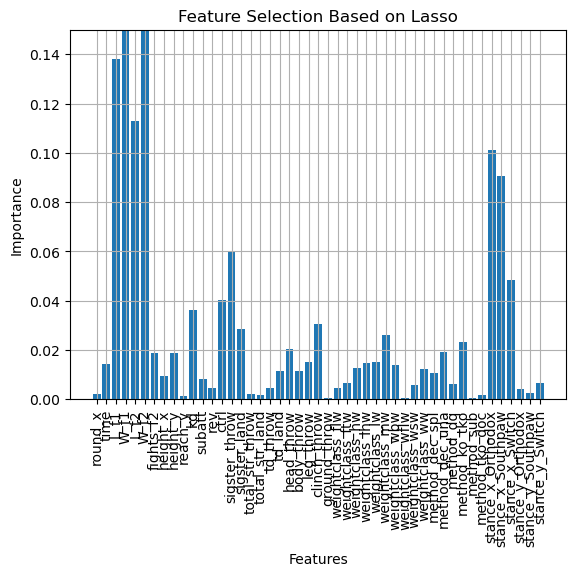

In [138]:
names=cleaned_features_V2.drop("outcome", axis=1).columns
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [139]:
significant_var = pd.DataFrame(names, lasso1_coef).reset_index()
significant_var.sort_values('index', ascending=False, inplace=True)

In [140]:
significant_var

,index,0
5,0.199362,W_f2
3,0.189548,W_f1
2,0.138130,L_f1
4,0.112895,L_f2
41,0.101082,stance_x_Orthodox
42,0.090599,stance_x_Southpaw
14,0.059851,sigster_throw
43,0.048321,stance_x_Switch
13,0.040434,ctrl
10,0.036034,kd


In [142]:
final_features = cleaned_features_V2.drop(['height_x',
'subatt',
'stance_y_Switch',
'weightclass_ftw',
'method_dq',
'weightclass_wsw',
'weightclass_flw',
'td_throw',
'rev',
'stance_y_Orthodox',
'stance_y_Southpaw',
'round_x',
'total_str_throw',
'method_tko_doc',
'total_str_land',
'reach_y',
'weightclass_wflw',
'ground_throw',
'method_sub'], axis= 1)



In [144]:
final_features

,outcome,time,L_f1,W_f1,L_f2,W_f2,fights_f2,height_y,kd,ctrl,...,weightclass_lw,weightclass_mw,weightclass_wbw,weightclass_ww,method_dec_spl,method_dec_una,method_ko_tko,stance_x_Orthodox,stance_x_Southpaw,stance_x_Switch
0,0.0,300,1.0,4.0,2.0,3.0,5.0,75.0,0.141818,40.192727,...,0,1,0,0,0,0,0,1,0,0
1,1.0,300,1.0,5.0,2.0,3.0,5.0,75.0,0.050909,-21.322424,...,0,0,0,0,0,1,0,1,0,0
2,0.0,292,2.0,3.0,2.0,3.0,5.0,75.0,0.117895,4.235789,...,0,1,0,0,0,0,1,1,0,0
3,1.0,300,4.0,3.0,2.0,3.0,5.0,75.0,0.113846,35.073846,...,0,1,0,0,0,0,0,1,0,0
4,0.0,300,1.0,0.0,2.0,3.0,5.0,75.0,-0.040000,-10.080000,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,1.0,243,0.0,1.0,1.0,1.0,2.0,69.0,0.138889,-64.777778,...,0,0,0,1,0,0,0,1,0,0
5715,0.0,300,2.0,1.0,0.0,2.0,2.0,70.0,-0.153846,-8.441026,...,0,0,0,1,0,1,0,0,1,0
5718,1.0,67,0.0,1.0,1.0,0.0,1.0,69.0,-0.169118,4.639706,...,0,0,0,1,0,0,1,1,0,0
5720,1.0,69,0.0,2.0,1.0,0.0,1.0,73.0,0.015873,75.063492,...,0,0,0,0,0,0,0,1,0,0


In [143]:
final_features.to_csv('/Users/cstone/Documents/School/MGMT 6203/Project/clean/final_features.csv')